Work in progress

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
df = pd.read_csv("BostonHousing.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [20]:
df.describe

<bound method NDFrame.describe of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [ ]:
df.isna()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [ ]:
df.isnull().any(axis=1).sum()


np.int64(0)

In [ ]:
df.dropna(axis=0)
df = df.dropna(axis=0)

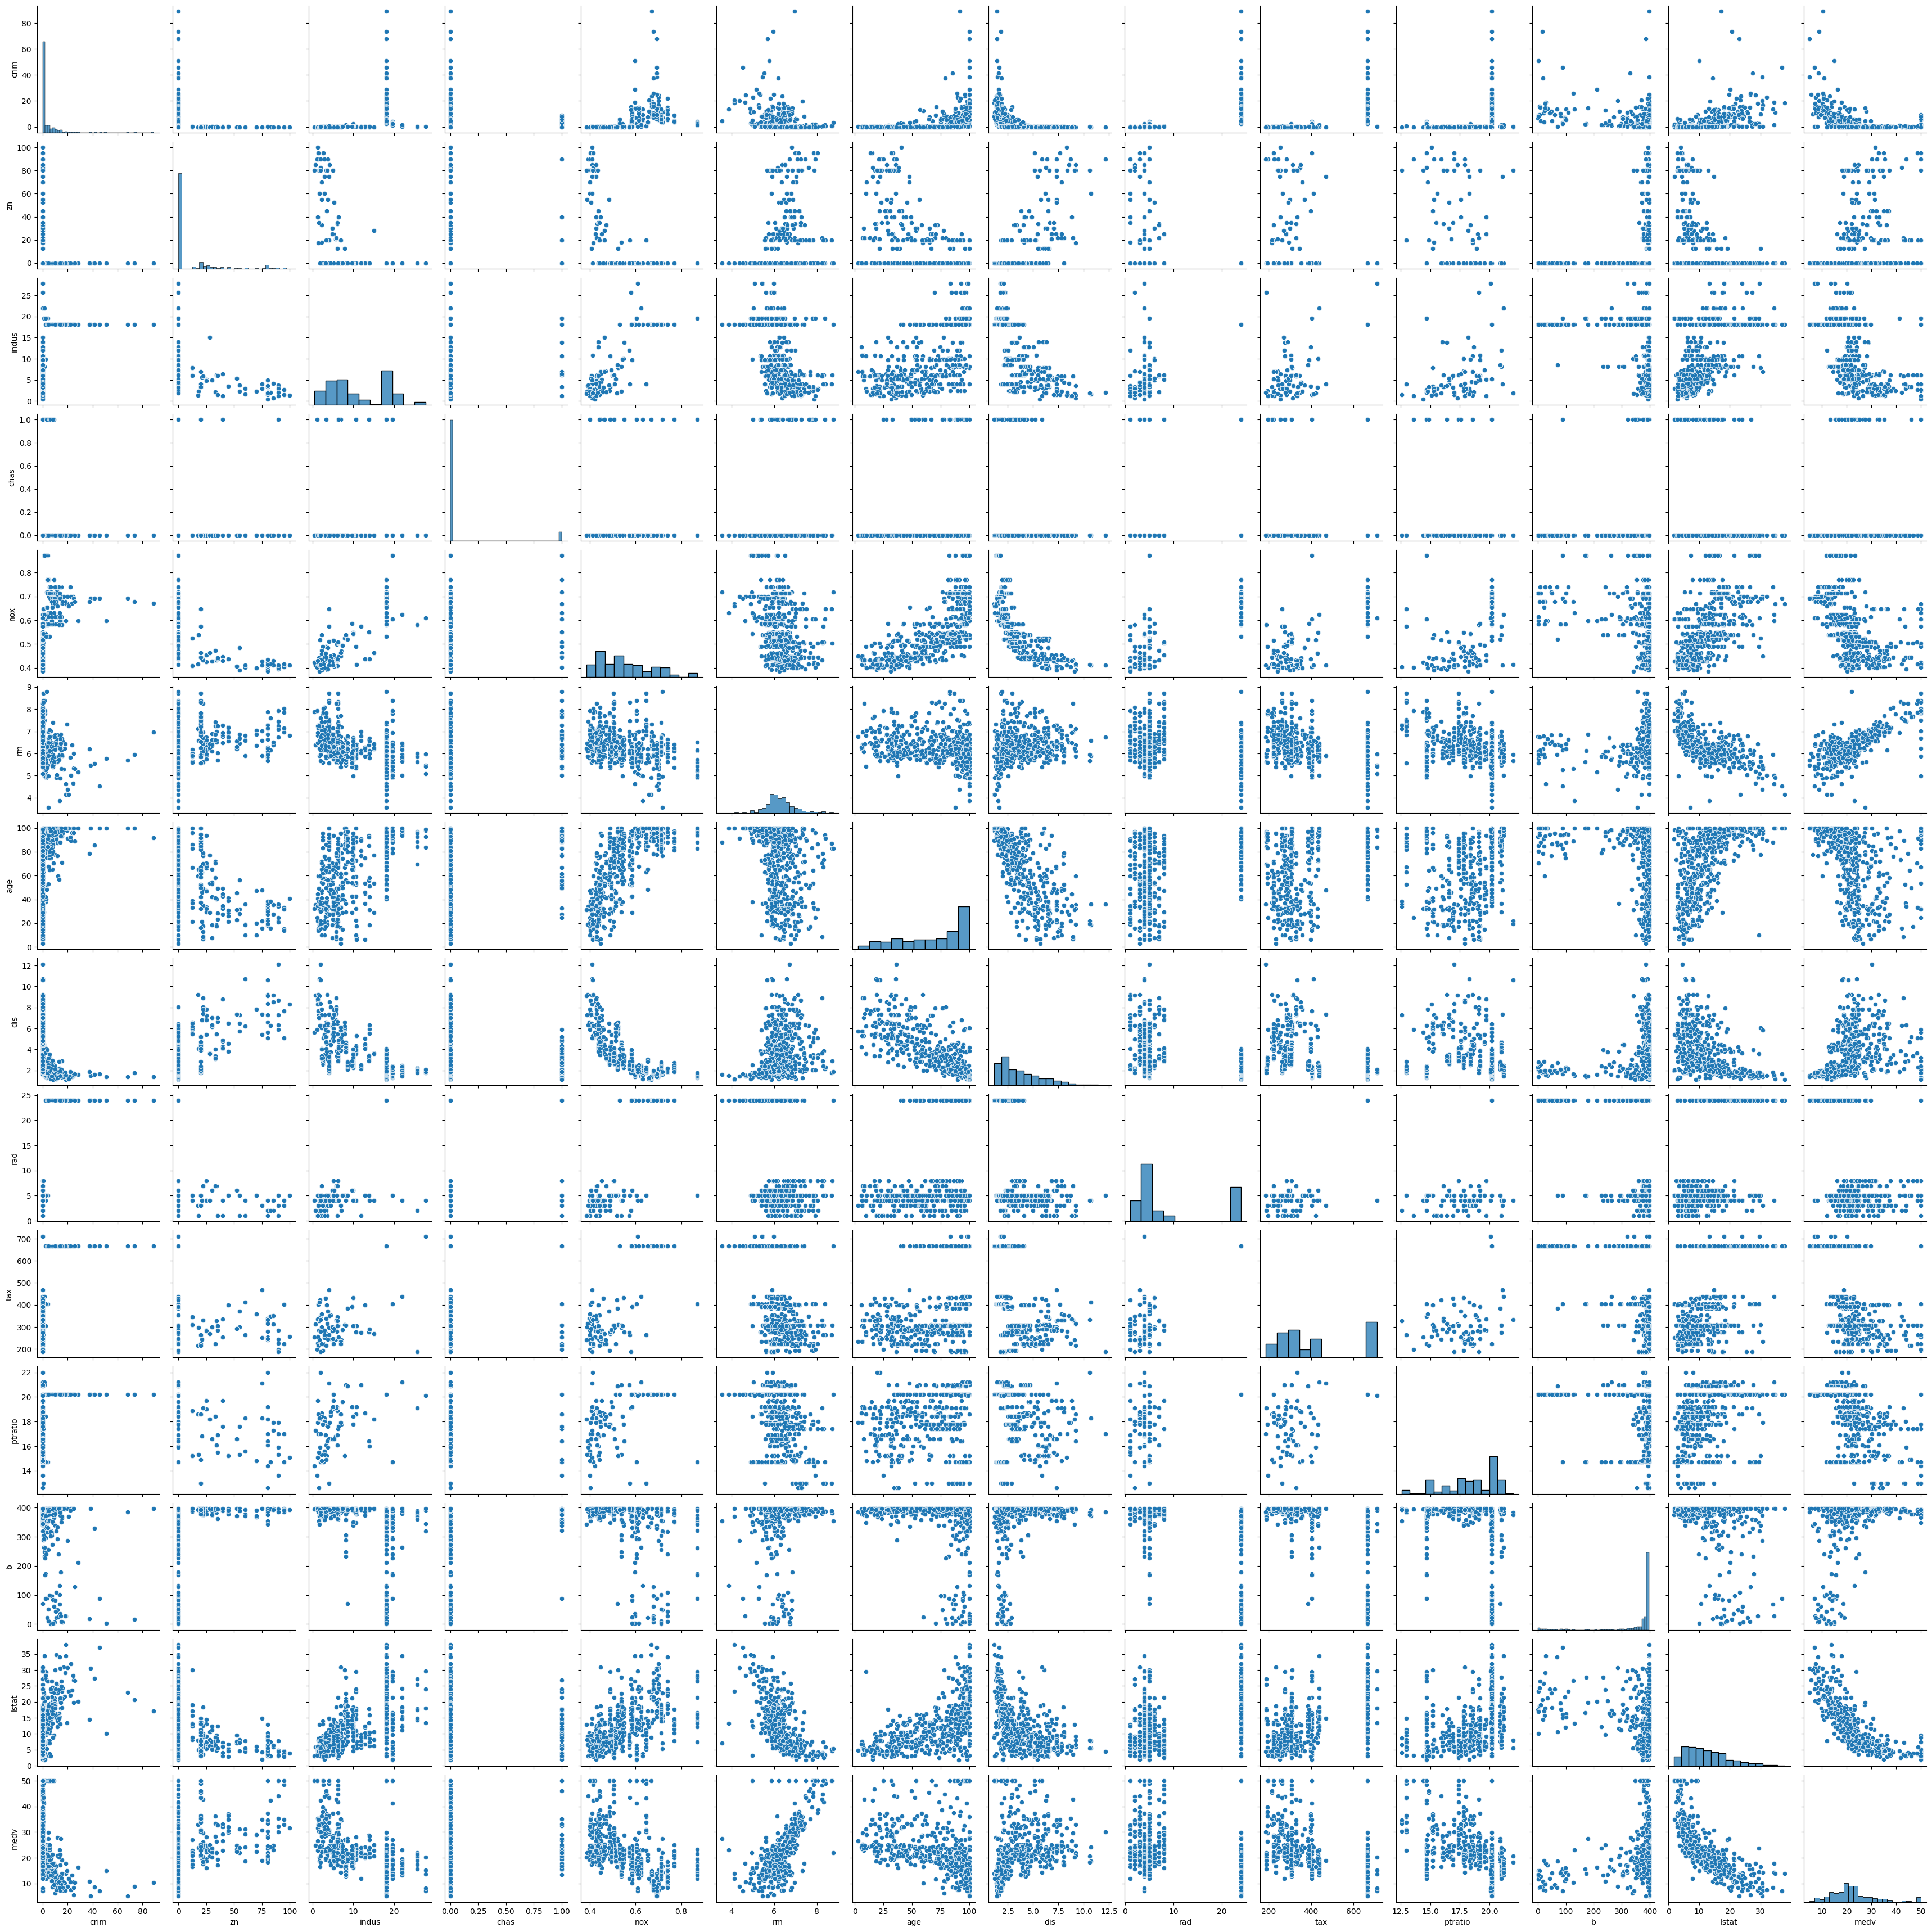

In [ ]:
sns.pairplot(df)


In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


In [21]:
Y = df["tax"]

X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['tax'])
